In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
import sys
from pathlib import Path
from glob import glob

import sklearn
import numpy as np
import pandas as pd
from glob import glob

from keras.models import load_model

import matplotlib
import matplotlib.pyplot as plt

filepath = Path(os.getcwd())
filepath

Using TensorFlow backend.


PosixPath('/vol/ml/apartin/projects/LearningCurves/notebooks')

In [5]:
rt = pd.read_csv(Path('../top6_trn/top6.lgb_reg.cvf5.GE.DD.AUC_2019-9-20_h14-m54/runtime.csv'))
rt.head()

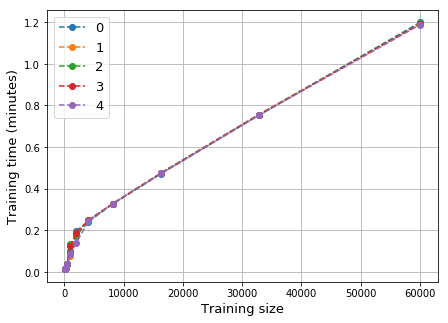

In [12]:
figsize=(7,5)
fontsize = 13
fig, ax = plt.subplots(figsize=figsize)
for f in rt['fold'].unique():
    d = rt[rt['fold']==f]
    ax.plot(d['tr_sz'], d['time'], 'o--', label=str(f))

ax.set_xlabel(f'Training size', fontsize=fontsize)
ax.set_ylabel(f'Training time (minutes)', fontsize=fontsize)

ax.legend(loc='best', frameon=True, fontsize=fontsize)
ax.grid(True)